Задача. Имеются данные производства птицефабрики по ежедневному уровню дефектности куриных яиц (отношение яиц с дефектами "грязь" и "насечка" к общему количеству яиц, собранных за сутки). за период 2019-2020 год. Необходимо проанализировать данные и дать ответы на вопросы:

    1) Изменился ли средний уровень дефектности по итогам 4-х месяцев 2020 года в сравнении с аналогичным периодом 2019 года
    
    2) Какова вероятность того, что в какой-либо день уровень дефектности превысит целевой уровень (не более 3%) при условии неизменности системы производства (стабильная система)?

In [337]:
import numpy as np
from math import sqrt
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import datetime as DT
import seaborn as sns
from pylab import rcParams
import math


In [329]:
def normaltest(distribution, alpha = 1e-3): #функция для провеедения анализа распределения на соответствие нормальному
    k2, p = stats.normaltest(distribution)
    if p < alpha:  # null hypothesis: distribution comes from a normal distribution
        print ("Распределение нельзя считать нормальным")
    else:
        print("Распределение можно считать нормальным")



In [170]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

### Разведочный анализ данных

In [171]:
dataframe = pd.read_csv('Dataframe.csv', sep=";", index_col=False)

In [172]:
dataframe["брак"] = (dataframe["грязь"]+ dataframe["насечка"])/dataframe["сбор"]
dataframe['Дата'] = dataframe['Дата'].astype('datetime64[ns]')
dataframe

,Дата,сбор,грязь,насечка,брак
0,2019-01-01,575700,11160,5230,0.028470
1,2019-02-01,570800,9720,7090,0.029450
2,2019-03-01,572700,9000,6630,0.027292
3,2019-04-01,564700,9360,6660,0.028369
4,2019-05-01,559700,11160,7050,0.032535
...,...,...,...,...,...
481,2020-04-26,633000,12960,4220,0.027141
482,2020-04-27,651350,11880,5200,0.026222
483,2020-04-28,630430,10440,4770,0.024126
484,2020-04-29,640800,9720,4970,0.022924


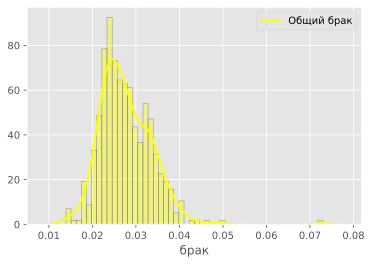

In [173]:
sns_plot = sns.distplot(dataframe["брак"], hist=True, kde=True, 
             bins=50, color = 'yellow', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2, 'label':"Общий брак"})

Поскольку мы знаем, что выброс по уровню брака >0.07 был связан со сбоем работы оборудования (причина устранена), исключим данное значение из датасета 

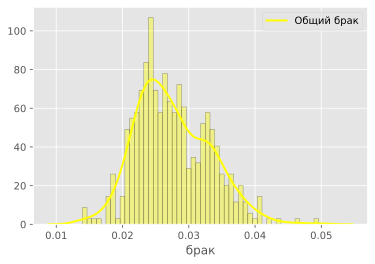

In [174]:
dataframe=dataframe[dataframe.брак < 0.07]
sns_plot = sns.distplot(dataframe["брак"], hist=True, kde=True, 
             bins=50, color = 'yellow', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2, 'label':"Общий брак"})

### Решение основной задачи

#### Проверим исходное распределение на нормальность, используя критерий Пирсона (функцию normaltest в библиотеке scipy)¶

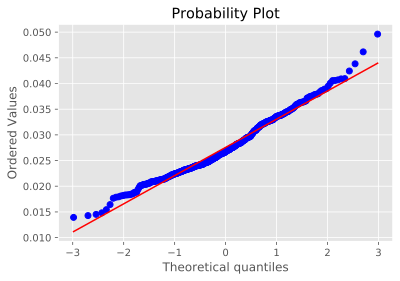

In [175]:
import pylab
import scipy.stats as stats
stats.probplot (dataframe["брак"], dist='norm', plot=pylab )
pylab.show()

In [330]:
normaltest(dataframe["брак"])

Распределение нельзя считать нормальным


In [176]:
stat, p = shapiro(dataframe["брак"])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.980, p=0.000


#### разделим датасет на данные за 2019 год, 4 мес  2019 года и 4 мес 2020 года

In [177]:
df2019 = dataframe.loc[dataframe['Дата'] < '2020-01-01']
dfQ2020 = dataframe.loc[dataframe['Дата'] >= '2020-01-01']
dfQ2019 = dataframe.loc[dataframe['Дата'] < '2019-05-01'] 

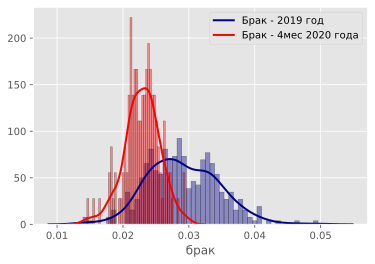

In [178]:
sns_plot = sns.distplot(df2019["брак"], hist=True, kde=True, 
             bins=50, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2, 'label':"Брак - 2019 год"})
sns_plot = sns.distplot(dfQ2020["брак"], hist=True, kde=True, 
             bins=50, color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2, 'label':"Брак - 4мес 2020 года"})

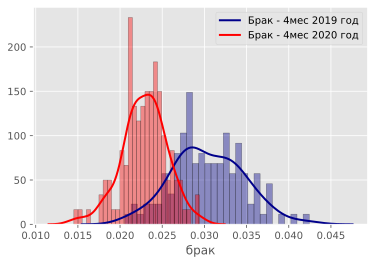

In [179]:
sns_plot = sns.distplot(dfQ2019["брак"], hist=True, kde=True, 
             bins=30, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2, 'label':"Брак - 4мес 2019 год"})
sns_plot = sns.distplot(dfQ2020["брак"], hist=True, kde=True, 
             bins=30, color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2, 'label':"Брак - 4мес 2020 год"})


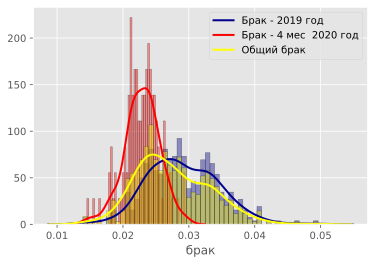

In [213]:
sns_plot = sns.distplot(df2019["брак"], hist=True, kde=True, 
             bins=50, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2, 'label':"Брак - 2019 год"})
sns_plot = sns.distplot(dfQ2020["брак"], hist=True, kde=True, 
             bins=50, color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2, 'label':"Брак - 4 мес  2020 год"})
sns_plot = sns.distplot(dataframe["брак"], hist=True, kde=True, 
             bins=50, color = 'yellow', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2, 'label':"Общий брак"})
#fig = sns_plot.get_figure()

#### Проверим на нормальность каждое из получившихся распределений в отдельности, используя критерий Пирсона (функцию normaltest в библиотеке scipy)

Данные по уровню дефектности за 4 месяца 2019 года

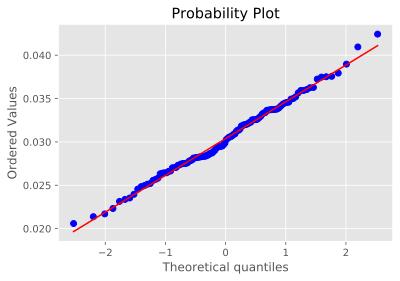

In [180]:
stats.probplot (dfQ2019["брак"], dist='norm', plot=pylab )
pylab.show()

In [331]:
normaltest(dfQ2019["брак"])

Распределение можно считать нормальным


Данные по дефектности за 4 месяца 2020 года

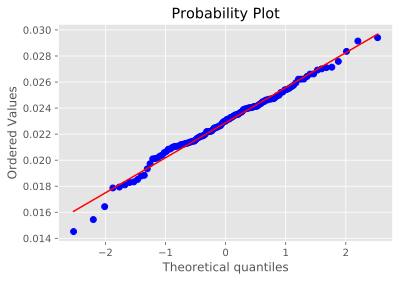

In [182]:
stats.probplot (dfQ2020["брак"], dist='norm', plot=pylab )
pylab.show()

In [375]:
normaltest (dfQ2020["брак"])

Распределение можно считать нормальным


##### Вывод: Видно, что в каждый из периодов в отдельности распределение имеет характер нормального, а в целом по всем периодам вместе тест на нормальность отрицательный. Это может быть связано с тем, что в течение времени характер распределения меняется, таким образом "смешивая" и искажая общую картину. В дальнейшем будем сравнивать и делать выводы на основе 2-х периодов (4 месяца 2019 года и 4 месяца 2020 год), которые имеют характер нормального распределения. 

#### Имея данные по распределению уровня деффектности за 4мес  2019 год (dfQ2019) и 4 мес 2020 года (dfQ2020), проверим гипотезу H0 о том, что матеметические ожидания этих распределений равны (приняв, что данные имеют нормальное распределение), с уровнем значимости a=0,05  при альтернативной гипотезе H1 об их неравенстве

Определим параметры распределений

1) Для 4 мес 2019 года

In [191]:
MQ2019 =dfQ2019["брак"].mean()
MQ2019 # математическое ожидание уровня дефектности за 4 мес 2019

0.03038200529597353

In [335]:
StdQ2019 =dfQ2019["брак"].std(ddof=1)
StdQ2019 #стандартное отклонение распределения уровня дефектности за 4 мес 2019 года

0.004203133498244732

1) Для 4мес 2020 года

In [197]:
MQ2020 =dfQ2020["брак"].mean()
MQ2020 # математическое ожидание уровня дефектности за 4мес  2020 г

0.022875320647004045

In [336]:
StdQ2020 =dfQ2020["брак"].std(ddof=1)
StdQ2020 #стандартное отклонение распределения уровня дефектности за 4 мес 2019 года

0.00267334284648105

In [347]:
n1 = len(dfQ2019["брак"].index)
n1

120

In [348]:
n2 = len(dfQ2020["брак"].index)
n2

121

#### Расчитаем статистики для проверки гипотезы о равенсвте математических ожиданий двух нормальных распределений по критерию Фишера

Общее количество измерений

In [344]:
n=n1+n2
n

241

Общее среднее из двух групп (периодов)

In [345]:
M=(dfQ2019["брак"].sum()+dfQ2020["брак"].sum())/n
M

0.026613088936947357

Сумма квадратов отклонений индивидуальных измерений от общего среденего

In [353]:
S=((dfQ2019["брак"]-M)**2).sum()+((dfQ2020["брак"]-M)**2).sum()
S

0.006354952839329964

Сумма квадратов отклонений средних групповых значений от общего среднего

In [359]:
Sf=n2*(MQ2020-M)**2+n1*(MQ2019-M)**2
Sf

0.0033950479890662087

Остаточная сумма квадратов отклонений

In [364]:
Sost = ((dfQ2020["брак"]-MQ2020)**2).sum()+ ((dfQ2019["брак"]-MQ2019)**2).sum()
Sost

0.002959904850263742

In [366]:
print ("Sost = ", Sost+Sf, " vs ", S)

Sost =  0.006354952839329951  vs  0.006354952839329964


Факторная дисперсия

In [369]:
Sigma_f = Sf/1
Sigma_f

0.0033950479890662087

Остаточная дисперсия

In [371]:
Sigma_ost=Sost/(n-2)
Sigma_ost

1.2384539122442436e-05

Расчетный критерий Фишера Fn:


In [373]:
Fn = Sigma_f/Sigma_ost
Fn

274.13599775496925

#### Из таблицы критических точек распределения Фишера для a=0,05; dвнут = 241-2 =239 и dмежд = 2-1 = 1 находим Fкр_табл=3,84.Поскольку Fn много больше чем Fкр_табл (247 > 3.84), то отвергаем гипотезу о равенстве математических ожиданий средних значений двух распределений

Проведем ANOVA-тест для проверки

In [339]:
scipy.stats.f_oneway(dfQ2019["брак"],dfQ2020["брак"])

F_onewayResult(statistic=274.13599775497056, pvalue=1.5582254020234798e-41)

#### Гипотеза о равенстве средних значений уровня дефектности 2-х различных периодов наблюдения отклоняем. Т.о. делаем вывод о том, что средний уровень дефектности изменился по итогам 4хмесяцев 2020 года в сравнении с аналогичным периодом 2019 года. 

#### Опираясь на данные 1 квартала 2019 года расчитаем вероятность того, что уровень дефектности в какой-либо день превысит целевой показатель objective= 3% (0,03) при отсутсвии изменений в системе.

Расчитаем параметры распределения

In [281]:
M=df2020["брак"].mean()
M #мат. ожидание

0.022875320647004045

In [282]:
S=df2020["брак"].std(ddof=0)
S

0.0026622730562958935

In [288]:
objective=0.03

In [271]:
rv_norm=scipy.stats.norm(loc=M, scale=S)

In [320]:
rcParams["figure.figsize"] = 6, 9

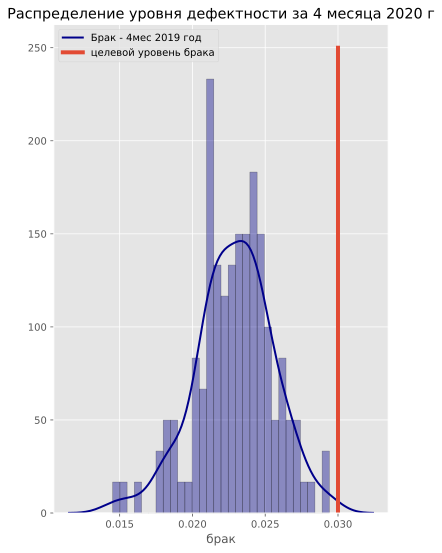

In [321]:
sns.distplot(dfQ2020["брак"], hist=True, kde=True, 
             bins=30, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2, 'label':"Брак - 4мес 2019 год"})
y = np.linspace(0, 250, 500)
plt.plot([objective] * 500, y, label='целевой уровень брака', linestyle='-', linewidth=4)
plt.title('Распределение уровня дефектности за 4 месяца 2020 г')
plt.legend(loc = 'upper left')

plt.show()

#sns.scatterplot(x, y, color="green", edgecolor='green')
#sns.scatterplot(x1, y1, color="red", edgecolor='red')


In [324]:
Z=(objective-M)/S
Z

2.676164015613316

In [325]:
from scipy.stats import norm

Вероятность превышения установленнного целевого показателя по браку:

In [326]:
p=1-norm.cdf(Z)
p

0.0037235095624975623

In [333]:
100-p*100

99.62764904375024

#### Вывод: установленная цель по уровню дефектности будет достигаться в 99,6% случаев, при условии стабильности системы производства (отсутсвия факторов, влияющих на распределение уровня дефектности), вероятность превышения установленного целевого уровня в какой-либо день крайне мала (0,4%)